In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_dir = "data/"

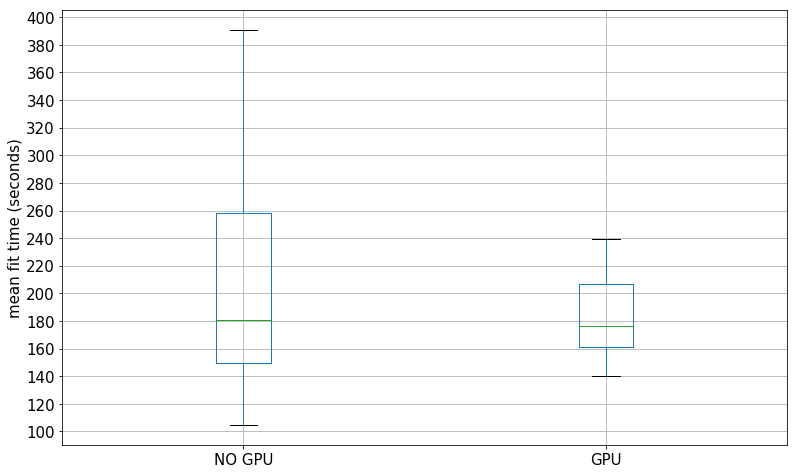

In [5]:
fit_times = pd.read_csv(data_dir + "cv_results_scaler_adam.csv")[["param_model__architecture", "mean_fit_time"]]
fit_times_gpu = pd.read_csv(data_dir + "cv_results_scaler_adam_gpu.csv")[["mean_fit_time"]].rename(index=float, columns={"mean_fit_time": "gpu_mean_fit_time"})
fit_times_concat = pd.concat([fit_times, fit_times_gpu], axis=1)
ax = fit_times_concat.boxplot(["mean_fit_time", "gpu_mean_fit_time"], figsize=(13,8), fontsize=15)
ax.set_xticklabels(["NO GPU","GPU"])
ax.set_ylabel("mean fit time (seconds)", fontsize=15)
ax.set_yticks(np.linspace(100,400,16))
print()

In [6]:
speed_up = fit_times_concat.mean_fit_time / fit_times_concat.gpu_mean_fit_time
fit_times_concat["speed_up"] = speed_up
fit_times_concat.sort_values("speed_up", inplace=True, ascending=False)
speed_up = fit_times_concat.drop(["mean_fit_time", "gpu_mean_fit_time"],axis=1)
speed_up.speed_up = (speed_up.speed_up)

Text(0, 0.5, 'Speed-up')

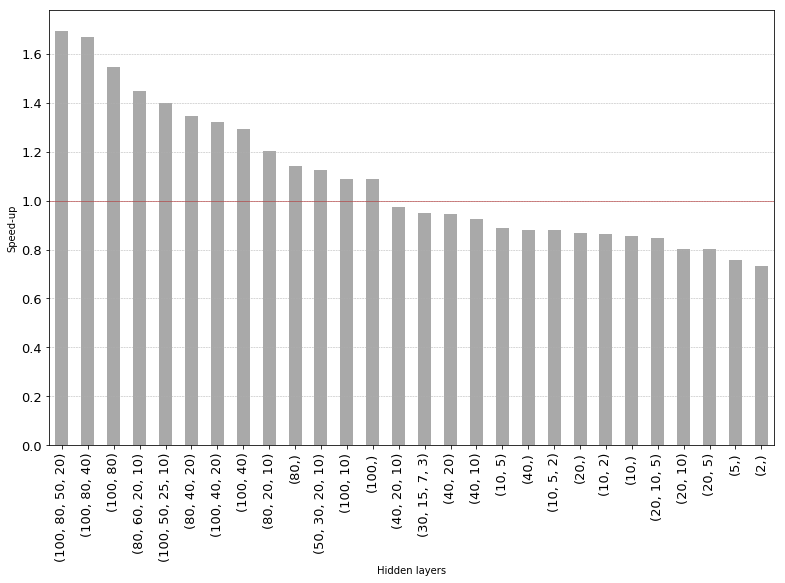

In [12]:
ax = speed_up.set_index("param_model__architecture").plot(kind="bar", figsize=(13,8), fontsize=13, legend=False, color="darkgrey", alpha=1)
ax.plot([-1,115], [1.0,1], linewidth=0.5, color="firebrick")
ax.yaxis.grid(linestyle="dashed", linewidth=0.5)
ax.set_xlabel("Hidden layers")
ax.set_ylabel("Speed-up")